In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

SyntaxError: invalid syntax (<ipython-input-31-79e03576e9f2>, line 6)

# Understanding data

In [2]:
df=pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.shape

(200, 6)

In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

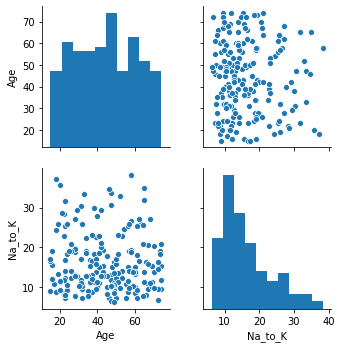

In [7]:
sns.pairplot(df)

In [8]:
print(df["Sex"].unique())
print(df["BP"].unique())
print(df["Cholesterol"].unique())
print(df["Drug"].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


from above data it is clear that it is a classification problem where we have to classify  drug for patient from list of availabele drugs on basis of diiferent values of different tests. so it is a classification problem. now we visulazie different feature to understand them in a  better way

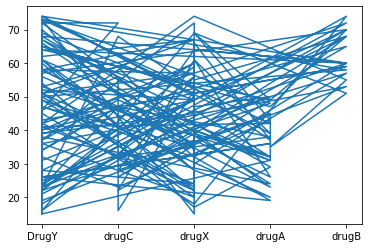

In [9]:
plt.plot(df["Drug"],df["Age"])

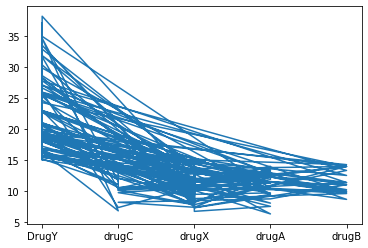

In [10]:
plt.plot(df["Drug"],df["Na_to_K"])

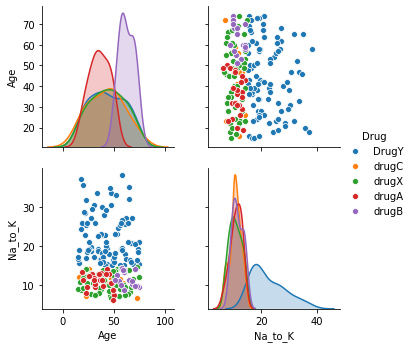

In [11]:
sns.pairplot(df,hue="Drug")

DrugB is on people with much higher age while Natok higher value has DrugY. Here Decision tree or random forest seems to be the better option.

# Data scaling, test train split and modeling

In [12]:
dataset_x = df.iloc[:, 0:5]
dataset_y=df.iloc[:,5]
dataset_x=pd.get_dummies(dataset_x)
dataset_x

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
5,22,8.607,1,0,0,0,1,1,0
6,49,16.275,1,0,0,0,1,1,0
7,41,11.037,0,1,0,1,0,1,0
8,60,15.171,0,1,0,0,1,1,0
9,43,19.368,0,1,0,1,0,0,1


In [13]:
scalar=StandardScaler()
dataset_x=scalar.fit_transform(dataset_x) 


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.33, random_state=42)

# Random forest algorithm

In [16]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [17]:
y_pred

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'DrugY'], dtype=object)

# Evalution of Random forest using confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix


In [19]:
confusion_matrix(y_test, y_pred)

array([[29,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 19]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        29
       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        19

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



wow! model has given 100% accuracy and preciseion with random forest algorithm

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
y_pred=clf.predict(X_test)
y_pred

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'DrugY'], dtype=object)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        29
       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        19

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66

